# 1. bayesian bandit / Thompson Sampling
Assume in each round, pull one arm only.

Simulation: reward of each arm follows a **bernoulli** distribution; model the mean reward of each arm using **Beta** function.
> for number_of_trials:<br>
> take random sample from each bandit with its current (a, b);<br>
> for the bandit with the largest sample, pull its arm,<br>
> update that bandit with data from the last pull.<br>

**TODO:**<br>
simulate the impact of delayed feedback.

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
# set real click probability of each arm
ARM_NUM = 5
epsilon = 1e-2
probs = [0.5] * ARM_NUM
probs = [i-epsilon if idx != 0 else i for (idx,i) in enumerate(probs)] # each arm's probability of clicked once pulled.
probs

[0.5, 0.49, 0.49, 0.49, 0.49]

In [3]:
class Env:
    @staticmethod
    def getFeedback(prob):
        'simulate bernoulli feedback with probability == prob.'
        assert prob >= 0 and prob <= 1
        click = int(np.random.random() <= prob)
        return click 

In [4]:
class TS_Arm:
    'Arm class for Thompson sampling algorithm. use Beta distribution as priors.'
    def __init__(self, idx):
        self.idx = idx
        self.a, self.b = 1.0, 1.0 # set prior param of beta distribution
        self.suc_cnt, self.fail_cnt = 0, 0
    def pull(self):
        'pull this arm, assume no delay of feedback and update params immediately.'
        click = Env.getFeedback(probs[self.idx])
        if click:
            self.suc_cnt += 1
            self.a += 1
        else:
            self.fail_cnt += 1
            self.b += 1
        
    def plotArm(self):
        'show this arm\'s probability of giving reward(i.e. click)'
        x = np.linspace(0,1,100)
        line, = plt.plot(x, beta.pdf(x, self.a, self.b), label="real p=%f" % probs[self.idx])
        plt.legend(handles=[line])
        plt.show() 

# a = TS_Arm(idx=0)
# for i in range(10):
#     a.pull()
# a.plotArm()

## simulate the bayesian bandit exploration.

trials #10000/100000
trials #20000/100000
trials #30000/100000
trials #40000/100000
trials #50000/100000
trials #60000/100000
trials #70000/100000
trials #80000/100000
trials #90000/100000
trials #100000/100000


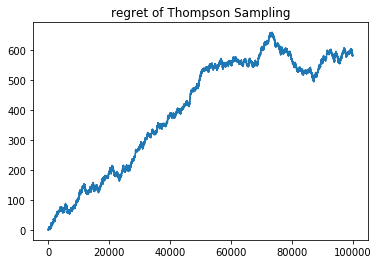

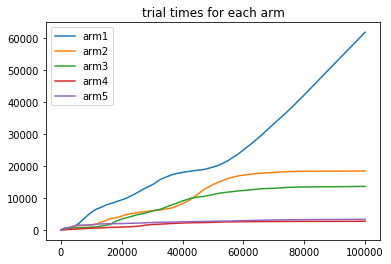

In [6]:
trials = int(1e+5)
trial_each = [[] for i in range(ARM_NUM)] # trend of each arm's trial times.
regrets = []

arms = []
for i in range(ARM_NUM):
    arms.append(Arm(idx=i))

for i in range(trials):
    if (i+1)%1e+4 == 0:
        print("trials #%d/%d" % (i+1, trials))
    sample = []
    for arm in arms:
        sample += [beta.rvs(arm.a, arm.b)]
    best_arm_idx = sample.index(max(sample))
    arms[best_arm_idx].pull() # pull the arm with largest sample
    
    for j in range(ARM_NUM):
        trial_each[j] += [arms[j].suc_cnt + arms[j].fail_cnt]
    
    regret = i*probs[0] - sum([arm.suc_cnt for arm in arms]) 
    regrets.append(regret)

plt.plot(np.arange(trials), regrets)
plt.title("regret of Thompson Sampling")
plt.show()

legend = []
for i in range(ARM_NUM):
    line, = plt.plot(np.arange(trials), trial_each[i], label = "arm%d"%(i+1))
    legend.append(line)
plt.title("trial times for each arm")
plt.legend(handles=legend)
plt.show()

## 2. UCB

# What if the likelihood does not follow bernoulli distribution? 
gaussian? others?